# Testing phase transition -- periodic Ring lattice

# Tome & Oliveira dynamics

## generating command lines

In [4]:
import numpy

#cmd_to_generate = ['par','seq']
cmd_to_generate = ['seq']

cmd_line_seq = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/run{run:d}/cp_ring_N{N:d}_l{lmbda:g}_seq_aval.mat -update sequential -iterdynamics tome_oliveira -expandtime -dtsample {dtsamp:d}'
cmd_line_par = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/run{run:d}/cp_ring_N{N:d}_l{lmbda:g}_par_aval.mat -update parallel -iterdynamics tome_oliveira'

#run_values   = numpy.arange(6,11)
run_values   = numpy.arange(1,11) # 1..10
N_values     = [100,500,1000,2560,5000]
tTrans       = 30000
tSim         = 200000 # tTotal = tTrans + tSim
dtsamp_func  = lambda N:10*N
#lmbda_values = numpy.linspace(1.0,4.5,100)
lmbda_values_seq = numpy.linspace(3.1,3.4,500)  # lmbda_values
lmbda_values_par = numpy.linspace(2.3,2.9,1000) # lmbda_values

cmd_line_filename = f'lines_to_run_CP_phasetrans_ring_TO.sh'
out_dir           =  'test_sim/phase_trans_TO'


with open(cmd_line_filename,'w') as f:
    
    for N in N_values:
        f.write(f'#N {N}\n')
        t0     = tTrans
        tTotal = t0 + tSim
        for run in run_values:
            f.write(f'#run {run}\n')
            if 'seq' in cmd_to_generate:
                if run == run_values[0]:
                    n_output_points      = tSim*N//dtsamp_func(N)
                    output_size_KB       = (2*8*n_output_points)/1024
                    total_output_size_KB = len(lmbda_values_seq)*len(run_values)*output_size_KB
                    print(f' * N={N}\n\t ... Estimate sample:\t\t\t {n_output_points} rho time points\n\t ... Estimate of output file size:\t {output_size_KB/1024:.3f} MB\n\t ... Total output size:\t\t\t {total_output_size_KB/1024/1024:.3f} GB')
                for l in lmbda_values_seq:
                    f.write(cmd_line_seq.format(lmbda=l,N=N,tTrans=t0,tTotal=tTotal,out_dir=out_dir,run=run,dtsamp=dtsamp_func(N)) + '\n')
                f.write('\n')
            if 'par' in cmd_to_generate:
                for l in lmbda_values_par:
                    f.write(cmd_line_par.format(lmbda=l,N=N,tTrans=t0,tTotal=tTotal,out_dir=out_dir,run=run) + '\n')
                f.write('\n')
            f.write('\n')
print('')
print(f' saved ::: {cmd_line_filename}')
print(f'         number of seq simulations = {len(N_values)*len(run_values)*len(lmbda_values_seq)}') if 'seq' in cmd_to_generate else None
print(f'         number of par simulations = {len(N_values)*len(run_values)*len(lmbda_values_par)}') if 'par' in cmd_to_generate else None

 * N=100
	 ... Estimate sample:			 20000 rho time points
	 ... Estimate of output file size:	 0.305 MB
	 ... Total output size:			 1.490 GB
 * N=500
	 ... Estimate sample:			 20000 rho time points
	 ... Estimate of output file size:	 0.305 MB
	 ... Total output size:			 1.490 GB
 * N=1000
	 ... Estimate sample:			 20000 rho time points
	 ... Estimate of output file size:	 0.305 MB
	 ... Total output size:			 1.490 GB
 * N=2560
	 ... Estimate sample:			 20000 rho time points
	 ... Estimate of output file size:	 0.305 MB
	 ... Total output size:			 1.490 GB
 * N=5000
	 ... Estimate sample:			 20000 rho time points
	 ... Estimate of output file size:	 0.305 MB
	 ... Total output size:			 1.490 GB

 saved ::: lines_to_run_CP_phasetrans_ring_TO.sh
         number of seq simulations = 25000


## Original dynamics (wrong critical point)


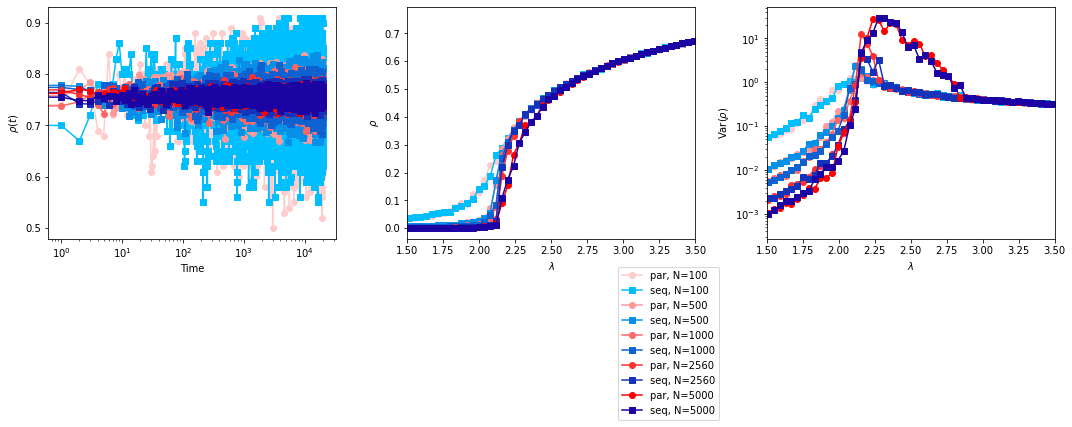

In [2]:
import os
import glob
import numpy
import matplotlib.pyplot as plt
import modules.io as io


import sys
import modules.plot_func as pltt
if pltt:
    del sys.modules['modules.plot_func']
    del pltt
import modules.plot_func as pltt


input_dir = ['test_sim/phase_trans_TO_old/N100/run0',
             'test_sim/phase_trans_TO_old/N500/run0',
             'test_sim/phase_trans_TO_old/N1000/run0',
             'test_sim/phase_trans_TO_old/N2560/run0',
             'test_sim/phase_trans_TO_old/N5000/run0']

pt_par = [ sorted([ io.import_mat_file(f) for f in glob.glob(os.path.join(inpd,'*_par_*.mat'))], key=lambda dd:dd.l) for inpd in input_dir ]
pt_seq = [ sorted([ io.import_mat_file(f) for f in glob.glob(os.path.join(inpd,'*_seq_*.mat'))], key=lambda dd:dd.l) for inpd in input_dir ]


N_values     = numpy.array([ dd[0].N for dd in pt_par ])

l_values_par = [ numpy.array([            dd.l                     for dd in dN ]) for dN in pt_par ]
rho_par      = [ numpy.array([ numpy.nanmean(dd.rho)               for dd in dN ]) for dN in pt_par ]
rho_var_par  = [ numpy.array([ float(dd.N) * numpy.nanvar( dd.rho) for dd in dN ]) for dN in pt_par ]

l_values_seq = [ numpy.array([            dd.l                     for dd in dN ]) for dN in pt_seq ]
rho_seq      = [ numpy.array([ numpy.nanmean(dd.rho)               for dd in dN ]) for dN in pt_seq ]
rho_var_seq  = [ numpy.array([ float(dd.N) * numpy.nanvar( dd.rho) for dd in dN ]) for dN in pt_seq ]



#colors = plt.get_cmap('cividis')(numpy.linspace(0,1,N_values.size))
colors_seq = pltt.cmap_blue_deep()(numpy.linspace(0,1,N_values.size))
colors_par = pltt.cmap_red_standard()(numpy.linspace(0,1,N_values.size))

plt.rcParams.update({'font.size':14})
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,4))

ax[2].sharex(ax[1])

for k,N in enumerate(N_values):
    ax[0].plot(pt_par[k][-1].time                 ,pt_par[k][-1].rho,'-o',label=f'par, N={N}',color=colors_par[k])
    ax[0].plot(pt_seq[k][-1].time/pt_seq[k][-1].dt,pt_seq[k][-1].rho,'-s',label=f'seq, N={N}',color=colors_seq[k])
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('$\\rho(t)$')
    ax[0].set_xscale('log')
    ax[1].plot(l_values_par[k],rho_par[k],'-o',label=f'par, N={N}',color=colors_par[k])
    ax[1].plot(l_values_seq[k],rho_seq[k],'-s',label=f'seq, N={N}',color=colors_seq[k])
    ax[1].set_xlabel('$\\lambda$')
    ax[1].set_ylabel('$\\rho$')
    ax[2].plot(l_values_par[k],rho_var_par[k],'-o',label=f'par, N={N}',color=colors_par[k])
    ax[2].plot(l_values_seq[k],rho_var_seq[k],'-s',label=f'seq, N={N}',color=colors_seq[k])
    ax[2].set_xlabel('$\\lambda$')
    ax[2].set_ylabel('Var($\\rho$)')
    ax[2].set_yscale('log')

ax[1].set_xlim((1.5,3.5))

plt.tight_layout()

ax[1].legend(bbox_to_anchor=(1.1,-0.1), loc='upper right')

plt.show()

## Modified dynamics (correct critical point)

### Timeevo-type simulation: Noisy phase transition data

The plot below is very noisy near the phase transition... I'm trying to figure out what caused such noisy order parameter plots.

Guesses:

1. Temporal correlation in $\rho(t)$ (for sequential update rule). There is evidence of strong autocorrelation below (in `plotting figures` section).
   Possible solutions: I introduced a lag for taking the average in the functions that calculate the mean $\rho$. It didn't seem to help. Anyways, it's better to have it than not. I also introduced a parameter `dtsample` in the simulations, so that data is sampled only at these intervals, reducing autocorrelation and the amount of generated data.
   Status: temporarily discarded as generating the noise.
2. `sim==timeevo` in the simulations. This is meant to implement the *quasi-stationary* sampling of Dickman. This can be causing bias because the reseed of the simulation state happens at some large $\rho$ (and this can cause a new 
   transient). Also, reseeding is now the first thing happening in the simulation time loop.
   Possible solutions: I now ran the simulations as `sim==aval`, so that reseeding always happens at a single site instead of reseeding.
   Status: pending checking the graphs.
3. Averaging over independent realizations of the simulation. I only averaged over time. I don't think this will help, since I do only average over time the GL neural network model, and I get nice results.
   Possible solutions: I now ran 5 independent realizations of the simulation.
   Status: pending checking the graphs.

#### loading data (~15 min for coarse data... 150 min for coarse + fine data)

In [5]:
import os
import sys
import glob
import numpy
import scipy.io
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
import modules.misc_func as misc
import modules.io as io
if ptd:
    del sys.modules['modules.phasetransdata']
    del ptd
import modules.phasetransdata as ptd

#data_to_plot = ['seq','par']
data_to_plot = ['seq']

base_dir  = 'test_sim/phase_trans_TO/time_evo_sim'

input_dir = [os.path.join(base_dir, subdir) for subdir in 
                ('N100/run0',
                 'N500/run0',
                 'N1000/run0',
                 'N2560/run0',
                 'N5000/run0')]

lmbda_values_broad     = numpy.linspace(1.0,4.5,100)
lmbda_values_fine_seq  = numpy.linspace(3.0,3.6,1000) # lmbda_values
lmbda_values_fine_par  = numpy.linspace(2.3,2.9,1000) # lmbda_values

load_phasetrans_data         = True
save_phasetrans_data         = True
return_file_data             = False
calc_suscept_bootstrap_error = True
n_time_sample_constant       = 100

N_values                     = numpy.array(misc.get_par_value_from_str(input_dir,'N',int)) #numpy.array([ dd[0].N for dd in d_par ])

if load_phasetrans_data:
    _       ,pt_par_TO,d_par_TO = ptd.load_phasetrans_file(os.path.join(base_dir,'phasetrans_ring_coarse_par.mat'))
    N_values,pt_seq_TO,d_seq_TO = ptd.load_phasetrans_file(os.path.join(base_dir,'phasetrans_ring_merged_seq.mat'))
else:
    if 'par' in data_to_plot:
        f_list_broad_par_iter = ([f for f in glob.glob(os.path.join(inpd,'*_par_*.mat')) if misc.par_value_in_str(f,'l',lmbda_values_broad,float,'{:g}')]  for inpd   in input_dir) # creating iterator that generates file lists
        pt_par_TO,d_par_TO    = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list in f_list_broad_par_iter ])
        if save_phasetrans_data:
            ptd.save_phasetrans_file(os.path.join(base_dir,'phasetrans_ring_coarse_par.mat'),N_values,pt_par_TO,d_par_TO)
    if 'seq' in data_to_plot:
        f_list_broad_seq_iter        = ([f for f in glob.glob(os.path.join(inpd,'*_seq_*.mat')) if misc.par_value_in_str(f,'l',lmbda_values_broad   ,float,'{:g}')]  for inpd   in input_dir) # creating iterator that generates file lists
        f_list_fine_seq_iter         = ([f for f in glob.glob(os.path.join(inpd,'*_seq_*.mat')) if misc.par_value_in_str(f,'l',lmbda_values_fine_seq,float,'{:g}')]  for inpd   in input_dir) # creating iterator that generates file lists
        pt_seq_TO     ,d_seq_TO      = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*n_time_sample_constant,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_broad_seq_iter, N_values) ])
        pt_fine_seq_TO,d_fine_seq_TO = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*n_time_sample_constant,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_fine_seq_iter , N_values) ])
        pt_seq_TO                    = ptd.merge_phasetrans_params_struct(pt_seq_TO,pt_fine_seq_TO,'l')
        if save_phasetrans_data:
            ptd.save_phasetrans_file(os.path.join(base_dir,'phasetrans_ring_merged_seq.mat'),N_values,pt_seq_TO,d_seq_TO)


#### plotting figures

* maximum of susceptibility:
lambda_max_seq(N) =  [3.31291 3.31532 3.33033 3.34294 3.32913]

* selected values for Finite-Size Scaling:
lambda_seq =  [2.48485 3.      3.2     4.00505 4.5    ]


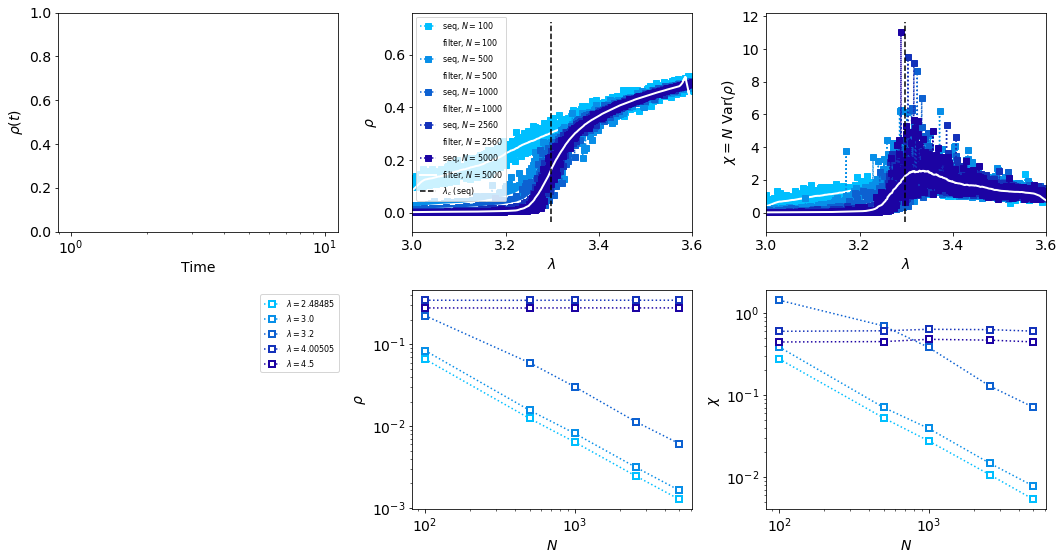

In [6]:
#colors = plt.get_cmap('cividis')(numpy.linspace(0,1,N_values.size))
import sys
import modules.plot_func as pltt
if pltt:
    del sys.modules['modules.plot_func']
    del pltt
import modules.plot_func as pltt
import modules.correlation as corr
import modules.phasetransdata as ptd

data_to_plot        = ['seq']
use_filter_suscept  = True


# filtering curves of rho and suscept
filter_func     = corr.moving_average # corr.scipy.signal.wiener    
filter_args     = dict(n=100)          # dict(mysize=300, noise=None)   # for moving average
if 'seq' in data_to_plot:
    pt_seq_TO_flt   = [ misc.structtype(l=pt.l,rho=filter_func(pt.rho,**filter_args),suscept=filter_func(pt.suscept,**filter_args)) for pt in pt_seq_TO ]

# getting max of susceptibility
l_c_seq         = 3.297848
dk              = 30
get_suscept_max = filter_func if use_filter_suscept else lambda x,**args: x
if 'par' in data_to_plot:
    l_max_vs_N_par                    = numpy.array([ dd.l[numpy.nanargmax(get_suscept_max(dd.suscept,**filter_args))] for dd in pt_par_TO ])
    l_c_app_par                       = l_max_vs_N_par[-2]
    l_probe_par                       = numpy.array([1.5, 2.0, l_c_app_par, 3.0, 3.5])
    l_selected_par,l_selected_ind_par = misc.find_closest_value(pt_par_TO[0].l,l_probe_par, return_all=True)
    #l_selected_par,l_selected_ind_par = pt_par_TO[0].l[((k:=misc.find_closest_value(pt_par_TO[0].l,l_c_app_par))-dk):(k+dk)],numpy.arange(pt_par_TO[0].l.size)[(k-dk):(k+dk)]
if 'seq' in data_to_plot:
    l_max_vs_N_seq                    = numpy.array([ dd.l[numpy.nanargmax(get_suscept_max(dd.suscept,**filter_args))] for dd in pt_seq_TO ])
    l_c_app_seq                       = 3.2#l_c_seq#l_max_vs_N_seq[-1]
    l_probe_seq                       = numpy.array([2.5, 3.0, l_c_app_seq, 4.0, 4.5])
    l_selected_seq,l_selected_ind_seq = misc.find_closest_value(pt_seq_TO[0].l,l_probe_seq, return_all=True)
    #l_selected_seq,l_selected_ind_seq = pt_seq_TO[0].l[((k:=misc.find_closest_value(pt_seq_TO[0].l,l_c_app_seq))-dk):(k+dk)],numpy.arange(pt_seq_TO[0].l.size)[(k-dk):(k+dk)]

# assuming simulations for all N have the same l values

# generating matrices rho[l,N] suscept[l,N]
if 'par' in data_to_plot:
    rho_l_N_par     = numpy.array([pt.rho[l_selected_ind_par]     for pt in pt_par_TO]).T
    suscept_l_N_par = numpy.array([pt.suscept[l_selected_ind_par] for pt in pt_par_TO]).T
if 'seq' in data_to_plot:
    rho_l_N_seq     = numpy.array([pt.rho[l_selected_ind_seq]     for pt in pt_seq_TO_flt]).T
    suscept_l_N_seq = numpy.array([pt.suscept[l_selected_ind_seq] for pt in pt_seq_TO_flt]).T

print('* maximum of susceptibility:')
print('lambda_max_par(N) = ',l_max_vs_N_par) if 'par' in data_to_plot else None
print('lambda_max_seq(N) = ',l_max_vs_N_seq) if 'seq' in data_to_plot else None
print('')
print('* selected values for Finite-Size Scaling:')
print('lambda_par = ',l_selected_par) if 'par' in data_to_plot else None
print('lambda_seq = ',l_selected_seq) if 'seq' in data_to_plot else None

if 'par' in data_to_plot:
    colors_par     = pltt.cmap_red_standard()(numpy.linspace(0,1,N_values.size))
    colors_par_FSS = pltt.cmap_red_standard()(numpy.linspace(0,1,l_selected_par.size))
if 'seq' in data_to_plot:
    colors_seq     = pltt.cmap_blue_deep()(   numpy.linspace(0,1,N_values.size))
    colors_seq_FSS = pltt.cmap_blue_deep()(   numpy.linspace(0,1,l_selected_seq.size))

plt.rcParams.update({'font.size':14})
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8))

ax[0,2].sharex(ax[0,1])
ax[1,0].set_visible(False)

# which lambda to show time series for
ind = -1

for k,N in enumerate(N_values):
    if 'par' in data_to_plot:
        if len(d_par_TO[k]):
            ax[0,0].plot(d_par_TO[k][ind].time , d_par_TO[k][ind].rho ,'-' ,label=f'par, $N={N}$',color=colors_par[k])
        ax[0,1].plot(     pt_par_TO[k].l       , pt_par_TO[k].rho     ,':o',label=f'par, $N={N}$',color=colors_par[k])
        ax[0,2].plot(     pt_par_TO[k].l       , pt_par_TO[k].suscept ,':o',label=f'par, $N={N}$',color=colors_par[k])
    if 'seq' in data_to_plot:
        if len(d_seq_TO[k]):
            ax[0,0].plot(d_seq_TO[k][ind].time/d_seq_TO[k][ind].N , d_seq_TO[k][ind].rho     ,'-' ,label=f'seq, $N={N}$',color=colors_seq[k])
        ax[0,1].plot(    pt_seq_TO[k].l                           , pt_seq_TO[k].rho         ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
        ax[0,2].plot(    pt_seq_TO[k].l                           , pt_seq_TO[k].suscept     ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
        ax[0,1].plot(    pt_seq_TO_flt[k].l                       , pt_seq_TO_flt[k].rho     ,'-' ,label=f'filter, $N={N}$',color='w',linewidth=2)
        ax[0,2].plot(    pt_seq_TO_flt[k].l                       , pt_seq_TO_flt[k].suscept ,'-' ,label=f'filter, $N={N}$',color='w',linewidth=2)
    ax[0,0].set_xlabel('Time')
    ax[0,0].set_ylabel('$\\rho(t)$')
    ax[0,0].set_xscale('log')
    #ax[0,0].set_yscale('log')
    ax[0,1].set_xlabel('$\\lambda$')
    ax[0,1].set_ylabel('$\\rho$')
    ax[0,2].set_xlabel('$\\lambda$')
    ax[0,2].set_ylabel('$\chi=N$ Var($\\rho$)')
    #ax[0,2].set_yscale('log')

#ax[0,1].set_xlim((0.25,0.35))
#ax[0,1].set_xlim((1.5,4.0))
ax[0,1].set_xlim((3.0,3.6))
#ax[0,2].set_ylim((5e-3,1e1))
#ax[0,2].set_ylim((0,4))

ax[0,1].vlines(l_c_seq,ymin=ax[0,1].get_ylim()[0],ymax=ax[0,1].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')
ax[0,2].vlines(l_c_seq,ymin=ax[0,2].get_ylim()[0],ymax=ax[0,2].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')

if 'par' in data_to_plot:
    for k,l in enumerate(l_selected_par):
        ax[1,1].errorbar(N_values,rho_l_N_par[k]    ,':o',label=f'$\\lambda={l}$',color=colors_par_FSS[k],markerfacecolor='w',markeredgewidth=2)
        ax[1,2].errorbar(N_values,suscept_l_N_par[k],':o',label=f'$\\lambda={l}$',color=colors_par_FSS[k],markerfacecolor='w',markeredgewidth=2)
if 'seq' in data_to_plot:
    for k,l in enumerate(l_selected_seq):
        ax[1,1].plot(N_values,rho_l_N_seq[k]    ,':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)
        ax[1,2].plot(N_values,suscept_l_N_seq[k],':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)

ax[1,1].set_xlabel('$N$')
ax[1,1].set_ylabel('$\\rho$')
ax[1,2].set_xlabel('$N$')
ax[1,2].set_ylabel('$\\chi$')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_xscale('log')
ax[1,2].set_yscale('log')

plt.tight_layout()
ax[0,1].legend(bbox_to_anchor=( 0.00,1.0), loc='upper left' , fontsize=8)
ax[1,1].legend(bbox_to_anchor=(-0.25,1.0), loc='upper right', fontsize=8)

plt.show()


structtype(
                   M: 100
                   N: 5000
                  X0: 1
              X0Rand: 1
               X_ind: array([], dtype=float64)
              X_time: array([], dtype=float64)
            X_values: array([], dtype=float64)
            cmd_line: 'contact_process.py -l 3.35375 -N 5000 -tTrans 100...
           docstring: 'usage: contact_process.py [-h] [-l l_PARAM] [-N N...
                  dt: 1.0
          expandtime: 0
                 fX0: 0.1
               graph: 'ring'
        iterdynamics: 'tome_oliveira'
                   l: 3.35375
        mergespkfile: 0
            noX0Rand: 0
          outputFile: 'test_sim/phase_trans_TO/N5000/corr_ring/cp_ring_N...
                 rho: array([0.2816, 0.2818, 0.2818, ..., 0.2928, 0.2928...
           saveSites: 0
                 sim: 'timeevo'
         spkFileName: array([], dtype='<U1')
              tTotal: 150000000
              tTrans: 100000000
                time: array([0.0000000e+00, 1.0000000e+0

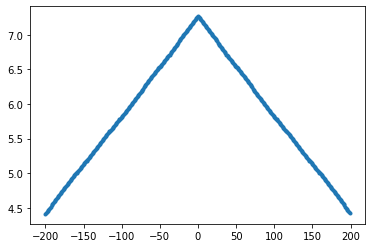

In [ ]:
import os
import sys
import glob
import numpy
import scipy.io
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
import modules.correlation as corr
import modules.misc_func as misc
import modules.io as io
if ptd:
    del sys.modules['modules.phasetransdata']
    del ptd
import modules.phasetransdata as ptd

base_dir  = 'test_sim/phase_trans_TO'

d=io.import_mat_file(os.path.join(base_dir,'N5000/run0/cp_ring_N5000_l3.35375_seq_timeevo.mat'))
#d=io.import_mat_file(os.path.join(base_dir,'N5000/run0/cp_ring_N5000_l3.2961_seq_timeevo.mat'))
#d=io.import_mat_file(os.path.join(base_dir,'N5000/run0/cp_ring_N5000_l2.59091_seq_timeevo.mat'))
print(d)


isl=slice(0,d.rho.size,20*d.N)

Cov_matrix = numpy.cov((d.rho[isl],d.rho[isl]))
C = corr.scipy.signal.correlate(d.rho[isl],d.rho[isl],method='fft',mode='same')
tlags = corr.scipy.signal.correlation_lags(d.rho[isl].size,d.rho[isl].size,mode='same')
rhom  = numpy.nanmean(d.rho)



m = int((len(C)+1)/2)
dtlag = 200


fig,ax=plt.subplots(nrows=1,ncols=1)

ax.plot(tlags[(m-dtlag):(m+dtlag)],C[(m-dtlag):(m+dtlag)]/numpy.linalg.norm(d.rho[isl]),'.-')
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.show()

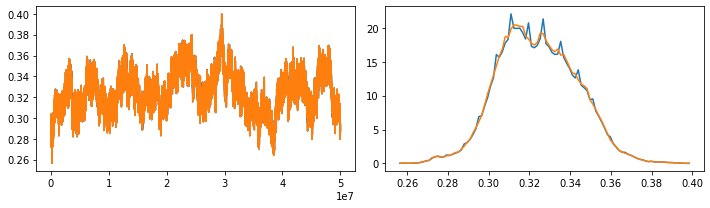

In [ ]:
#nbins  = d.rho.size//d.N
rhob   = ptd.bin_time_series(d.rho,d.rho.size//(1000*d.N))

print(d.rho.size)
print(rhob.size)

Pb,bb  = numpy.histogram(rhob,100,density=True)
P,b    = numpy.histogram(d.rho,100,density=True)


fig,ax = plt.subplots(nrows=1,ncols=2, figsize=(10,3))

ax[0].plot(d.time,d.rho,'-')
ax[0].plot(numpy.linspace(d.time[0],d.time[-1],rhob.size), rhob,'-')

ax[1].plot(b[:-1] ,P,'-')
ax[1].plot(bb[:-1],Pb,'-')

plt.tight_layout()

plt.show()

In [ ]:
print(P.size)
print(d.rho.size/d.N)

In [ ]:
k_start, k_stop, k_step = isl.indices(d.rho.size)
n_data                  = (k_stop - k_start + k_step - 1) // k_step
print(n_data)
print(d.rho[isl].size)

In [ ]:
print(Cov_matrix)
print(numpy.max(C)/numpy.linalg.norm(d.rho[-10*d.N:]))
print()

In [16]:
import gc

plt.close(fig)
plt.close('all')
gc.collect()

6643

####  sampling with intervals of 100*N does not change noise

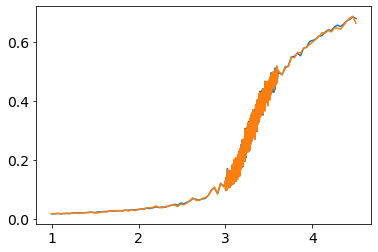

In [10]:
import os
import sys
import glob
import numpy
import scipy.io
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
import modules.misc_func as misc
import modules.io as io
if ptd:
    del sys.modules['modules.phasetransdata']
    del ptd
import modules.phasetransdata as ptd

#data_to_plot = ['seq','par']
data_to_plot = ['seq']

base_dir  = 'test_sim/phase_trans_TO/time_evo_sim'

input_dir = [os.path.join(base_dir, subdir) for subdir in 
                ('N100/run0',)]

lmbda_values_broad     = numpy.linspace(1.0,4.5,100)
lmbda_values_fine_seq  = numpy.linspace(3.0,3.6,1000) # lmbda_values

return_file_data             = False
calc_suscept_bootstrap_error = False
#n_time_sample_constant       = 100

N_values                     = numpy.array(misc.get_par_value_from_str(input_dir,'N',int)) #numpy.array([ dd[0].N for dd in d_par ])

f_list_broad_seq_iter        = [[f for f in glob.glob(os.path.join(inpd,'*_seq_*.mat')) if misc.par_value_in_str(f,'l',lmbda_values_broad   ,float,'{:g}')]  for inpd   in input_dir] # creating iterator that generates file lists
f_list_fine_seq_iter         = [[f for f in glob.glob(os.path.join(inpd,'*_seq_*.mat')) if misc.par_value_in_str(f,'l',lmbda_values_fine_seq,float,'{:g}')]  for inpd   in input_dir] # creating iterator that generates file lists

pt_seq_TO     ,d_seq_TO      = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*100,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_broad_seq_iter, N_values) ])
pt_fine_seq_TO,d_fine_seq_TO = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*100,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_fine_seq_iter , N_values) ])
pt_seq_TO_100                = ptd.merge_phasetrans_params_struct(pt_seq_TO,pt_fine_seq_TO,'l')


pt_seq_TO     ,d_seq_TO      = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*20,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_broad_seq_iter, N_values) ])
pt_fine_seq_TO,d_fine_seq_TO = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(f_list,'l',time_k1=10000,time_k2=10000,n_time_steps_sample=N*20,return_file_data=return_file_data,calc_suscept_bootstrap_error=calc_suscept_bootstrap_error) for f_list,N in zip(f_list_fine_seq_iter , N_values) ])
pt_seq_TO_20                = ptd.merge_phasetrans_params_struct(pt_seq_TO,pt_fine_seq_TO,'l')


fig,ax = plt.subplots(nrows=1,ncols=1)

ax.plot( pt_seq_TO_20[0].l, pt_seq_TO_20[0].rho,'-')
ax.plot(pt_seq_TO_100[0].l,pt_seq_TO_100[0].rho,'-')

plt.show()


## Avalanche-type simulation

### loading data

In [ ]:
import os
import sys
import glob
import numpy
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
if ptd:
    del sys.modules['modules.phasetransdata']
    del ptd
import modules.phasetransdata as ptd
import modules.misc_func as misc
if misc:
    del sys.modules['modules.misc_func']
    del misc
import modules.misc_func as misc
from IPython.display import clear_output


run_to_load_first = 1
run_to_load_last  = 10

base_dir       = 'test_sim/phase_trans_TO/dtsample_N'

N_values       = numpy.sort(numpy.array(misc.get_par_value_from_str(glob.glob('test_sim/phase_trans_TO/N*/'),'N'))) #numpy.array([ dd[0].N for dd in d_par ])
runs_to_load   = numpy.arange(run_to_load_first,run_to_load_last+1)
input_dir_list = misc.select_str_by_par_value([ glob.glob(os.path.join(base_dir,f'N{N}/run*')) for N in N_values ],'run',runs_to_load,int,'{:d}')
############### 
############### input_dir_list[i] -> [ list of input directores for all runs of N_values[i] ]
###############                       e.g.
############### input_dir_list = [  [all run dirs of N1], [all run dirs of N2], [ ... ], ...  ]
############### 

n_inpt_dir = sum( len(i) for i in input_dir_list )
pt_seq_TO  = [None for _ in N_values]
for k,(input_dir,N) in enumerate(zip(input_dir_list,N_values)):
    pt_seq_TO_run,d_seq_TO = misc.unpack_list_of_tuples([
        (
            print(f'loading {misc.get_percent_load_str(i+k*len(input_dir),n_inpt_dir)}  :::  N={N} ... {inpd} > {misc.get_percent_load_str(i,len(input_dir))}'),
            ptd.calc_phasetrans_params_struct(glob.glob(os.path.join(inpd,'*_seq_*.mat')),'l',time_k1=10000,time_k2=10000,return_file_data=True,calc_suscept_bootstrap_error=True,return_as_struct=False),
            clear_output(wait=True)
        )[1]
        for i,inpd in enumerate(input_dir)
        ])
    pt_seq_TO[k]           = ptd.calc_mean_phasetrans_params(pt_seq_TO_run,param_name_control='l',param_name_orderpar='rho',return_as_struct=True)
    clear_output(wait=True)
print('done loading')



done loading


### plotting figures

* maximum of susceptibility:
lambda_max_seq(N) =  [3.2996  3.32846 3.32966 3.36032 3.37054]

* selected values for Finite-Size Scaling:
lambda_seq =  [3.1    3.1    3.1998 3.4    3.4   ]


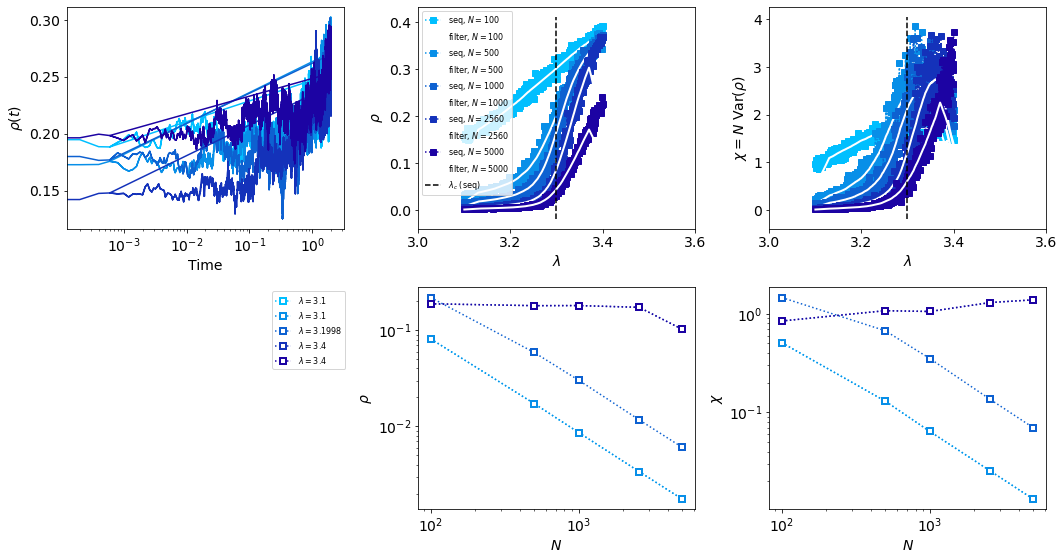

In [45]:
#colors = plt.get_cmap('cividis')(numpy.linspace(0,1,N_values.size))
import sys
import modules.plot_func as pltt
if pltt:
    del sys.modules['modules.plot_func']
    del pltt
import modules.plot_func as pltt
import modules.correlation as corr
import modules.phasetransdata as ptd

data_to_plot        = ['seq']
use_filter_suscept  = True


# filtering curves of rho and suscept
filter_func     = corr.moving_average # corr.scipy.signal.wiener    
filter_args     = dict(n=100)          # dict(mysize=300, noise=None)   # for moving average
pt_seq_TO_flt   = [ misc.structtype(l=pt.l,rho=filter_func(pt.rho,**filter_args),suscept=filter_func(pt.suscept,**filter_args)) for pt in pt_seq_TO ]

# getting max of susceptibility
l_c_seq         = 3.297848
dk              = 30
get_suscept_max = filter_func if use_filter_suscept else lambda x,**args: x
l_max_vs_N_seq                    = numpy.array([ dd.l[numpy.nanargmax(get_suscept_max(dd.suscept,**filter_args))] for dd in pt_seq_TO ])
l_c_app_seq                       = 3.2#l_c_seq#l_max_vs_N_seq[-1]
l_probe_seq                       = numpy.array([2.5, 3.0, l_c_app_seq, 4.0, 4.5])
l_selected_seq,l_selected_ind_seq = misc.find_closest_value(pt_seq_TO[0].l,l_probe_seq, return_all=True)
#l_selected_seq,l_selected_ind_seq = pt_seq_TO[0].l[((k:=misc.find_closest_value(pt_seq_TO[0].l,l_c_app_seq))-dk):(k+dk)],numpy.arange(pt_seq_TO[0].l.size)[(k-dk):(k+dk)]

# assuming simulations for all N have the same l values

# generating matrices rho[l,N] suscept[l,N]
rho_l_N_seq     = numpy.array([pt.rho[l_selected_ind_seq]     for pt in pt_seq_TO_flt]).T
suscept_l_N_seq = numpy.array([pt.suscept[l_selected_ind_seq] for pt in pt_seq_TO_flt]).T

print('* maximum of susceptibility:')
print('lambda_max_seq(N) = ',l_max_vs_N_seq)
print('')
print('* selected values for Finite-Size Scaling:')
print('lambda_seq = ',l_selected_seq)

colors_seq     = pltt.cmap_blue_deep()(   numpy.linspace(0,1,N_values.size))
colors_seq_FSS = pltt.cmap_blue_deep()(   numpy.linspace(0,1,l_selected_seq.size))

plt.rcParams.update({'font.size':14})
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8))

ax[0,2].sharex(ax[0,1])
ax[1,0].set_visible(False)

# which lambda to show time series for
ind = -1

for k,N in enumerate(N_values):
    if len(d_seq_TO[k]):
        ax[0,0].plot(d_seq_TO[k][ind].time/d_seq_TO[k][ind].N , d_seq_TO[k][ind].rho     ,'-' ,label=f'seq, $N={N}$',color=colors_seq[k])
    ax[0,1].plot(    pt_seq_TO[k].l                           , pt_seq_TO[k].rho         ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
    ax[0,2].plot(    pt_seq_TO[k].l                           , pt_seq_TO[k].suscept     ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
    ax[0,1].plot(    pt_seq_TO_flt[k].l                       , pt_seq_TO_flt[k].rho     ,'-' ,label=f'filter, $N={N}$',color='w',linewidth=2)
    ax[0,2].plot(    pt_seq_TO_flt[k].l                       , pt_seq_TO_flt[k].suscept ,'-' ,label=f'filter, $N={N}$',color='w',linewidth=2)
    ax[0,0].set_xlabel('Time')
    ax[0,0].set_ylabel('$\\rho(t)$')
    ax[0,0].set_xscale('log')
    #ax[0,0].set_yscale('log')
    ax[0,1].set_xlabel('$\\lambda$')
    ax[0,1].set_ylabel('$\\rho$')
    ax[0,2].set_xlabel('$\\lambda$')
    ax[0,2].set_ylabel('$\chi=N$ Var($\\rho$)')
    #ax[0,2].set_yscale('log')

#ax[0,1].set_xlim((0.25,0.35))
#ax[0,1].set_xlim((1.5,4.0))
ax[0,1].set_xlim((3.0,3.6))
#ax[0,2].set_ylim((5e-3,1e1))
#ax[0,2].set_ylim((0,4))

ax[0,1].vlines(l_c_seq,ymin=ax[0,1].get_ylim()[0],ymax=ax[0,1].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')
ax[0,2].vlines(l_c_seq,ymin=ax[0,2].get_ylim()[0],ymax=ax[0,2].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')

for k,l in enumerate(l_selected_seq):
    ax[1,1].plot(N_values,rho_l_N_seq[k]    ,':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)
    ax[1,2].plot(N_values,suscept_l_N_seq[k],':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)

ax[1,1].set_xlabel('$N$')
ax[1,1].set_ylabel('$\\rho$')
ax[1,2].set_xlabel('$N$')
ax[1,2].set_ylabel('$\\chi$')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_xscale('log')
ax[1,2].set_yscale('log')

plt.tight_layout()
ax[0,1].legend(bbox_to_anchor=( 0.00,1.0), loc='upper left' , fontsize=8)
ax[1,1].legend(bbox_to_anchor=(-0.25,1.0), loc='upper right', fontsize=8)

plt.show()


### checking autocorr

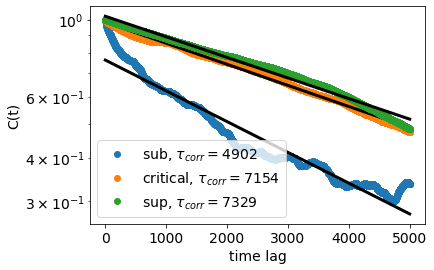

In [ ]:
import os
import sys
import glob
import numpy
import scipy.io
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
import modules.correlation as corr
import modules.misc_func as misc
import modules.io as io
if ptd:
    del sys.modules['modules.phasetransdata']
    del ptd
import modules.phasetransdata as ptd

base_dir  = 'test_sim/phase_trans_TO/dtsample_N'

d_sub=io.import_mat_file(os.path.join(base_dir,'N5000/run1/cp_ring_N5000_l3.1_seq_aval.mat'))
d_cri=io.import_mat_file(os.path.join(base_dir,'N5000/run1/cp_ring_N5000_l3.29479_seq_aval.mat'))
d_sup=io.import_mat_file(os.path.join(base_dir,'N5000/run1/cp_ring_N5000_l3.3519_seq_aval.mat'))


Cov_matrix = [None for _ in range(3)]
C          = [None for _ in range(3)]
tlags      = [None for _ in range(3)]
rhom       = [None for _ in range(3)]
m          = [None for _ in range(3)]
fitres     = [None for _ in range(3)]
for k,d in enumerate((d_sub,d_cri,d_sup)):
    #isl=slice(0,d.rho.size,d.N)
    isl=slice(0,d.rho.size)
    Cov_matrix[k] = numpy.cov((d.rho[isl],d.rho[isl]))
    C[k]          = corr.scipy.signal.correlate(d.rho[isl],d.rho[isl],method='fft',mode='same')
    tlags[k]      = corr.scipy.signal.correlation_lags(d.rho[isl].size,d.rho[isl].size,mode='same')
    rhom[k]       = numpy.nanmean(d.rho)
    m[k]          = int((len(C[k])+1)/2)
    C_max         = numpy.nanmax(C[k][m[k]:])
    fitres[k]     = misc.linearized_fit(tlags[k][m[k]:],C[k][m[k]:]/C_max, x_transform=lambda x:x, y_transform=numpy.log, inverse_transform=numpy.exp)

#print([-1/fr.fitpar[0] for fr in fitres])

leg_txt = ['sub','critical','sup']
fig,ax=plt.subplots(nrows=1,ncols=1)
for k in range(len(C)):
    C_max = numpy.nanmax(C[k][m[k]:])
    ax.plot(tlags[k][m[k]:],C[k][m[k]:]/C_max,'o',label=f'{leg_txt[k]}, $\\tau_{{corr}}={-1/fitres[k].fitpar[0]:.4g}$')
    ax.plot(fitres[k].x_fit,fitres[k].y_fit  ,'-',color='k',linewidth=3)
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('time lag')
ax.set_ylabel('C(t)')
ax.legend()
plt.show()

# Marro & Dickman dynamics

## generating command lines

In [ ]:
import numpy

#cmd_to_generate = ['par','seq']
cmd_to_generate = ['seq']

cmd_line_seq = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/run{run:d}/cp_ring_N{N:d}_l{lmbda:g}_seq_aval.mat -update sequential -iterdynamics marro_dickman'
cmd_line_par = 'contact_process.py -l {lmbda:g} -N {N:d} -tTrans {tTrans:d} -tTotal {tTotal:d} -graph ring -X0 1 -fX0 0.0 -sim aval -outputFile {out_dir:s}/N{N:d}/run{run:d}/cp_ring_N{N:d}_l{lmbda:g}_par_aval.mat -update parallel -iterdynamics marro_dickman'

n_sim_run = 8
N_values  = [40,100,500,1000,2560]#[100,500,1000,2560,5000]
tTrans    = 30000
tSim      = 10000

cmd_line_filename = f'lines_to_run_CP_phasetrans_ring_MD.sh'
out_dir           =  'test_sim/phase_trans_MD'

lmbda_values     = numpy.linspace(1.0,4.5,100)
lmbda_values_seq = lmbda_values
lmbda_values_par = lmbda_values

with open(cmd_line_filename,'w') as f:
    for run in range(1,n_sim_run+1):
        f.write(f'#run {run}\n')
        t0     = 3*tTrans
        tTotal = t0 + tSim
        for N in N_values:
            if 'seq' in cmd_to_generate:
                for l in lmbda_values_seq:
                    f.write(cmd_line_seq.format(lmbda=l,N=N,tTrans=t0*N,tTotal=tTotal*N,out_dir=out_dir,run=run) + '\n')
                f.write('\n')
            if 'par' in cmd_to_generate:
                for l in lmbda_values_par:
                    f.write(cmd_line_par.format(lmbda=l,N=N,tTrans=t0,tTotal=tTotal,out_dir=out_dir,run=run) + '\n')
                f.write('\n')
            f.write('\n')

## Original dynamics

### loading data (~15 min)

In [ ]:
import os
import glob
import numpy
import matplotlib.pyplot as plt
import modules.phasetransdata as ptd
import modules.misc_func as misc

data_to_plot = ['seq','par']
#data_to_plot = ['par']

input_dir = ['test_sim/phase_trans_MD/N100/run0',
             'test_sim/phase_trans_MD/N500/run0',
             'test_sim/phase_trans_MD/N1000/run0',
             'test_sim/phase_trans_MD/N2560/run0',
             'test_sim/phase_trans_MD/N5000/run0']

if 'par' in data_to_plot:
    pt_par_MD,d_par_MD = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(glob.glob(os.path.join(inpd,'*_par_*.mat')),'l',time_k1=10000,time_k2=10000,return_file_data=True,calc_suscept_bootstrap_error=True) for inpd in input_dir ])
if 'seq' in data_to_plot:
    pt_seq_MD,d_seq_MD = misc.unpack_list_of_tuples([ ptd.calc_phasetrans_params_struct(glob.glob(os.path.join(inpd,'*_seq_*.mat')),'l',time_k1=10000,time_k2=10000,return_file_data=True,calc_suscept_bootstrap_error=True) for inpd in input_dir ])


N_values     = numpy.array(misc.get_par_value_from_str(input_dir,'N')) #numpy.array([ dd[0].N for dd in d_par ])


### plotting figures

In [ ]:
#colors = plt.get_cmap('cividis')(numpy.linspace(0,1,N_values.size))
#import sys
#del sys.modules['modules.plot_func']
#del pltt
import modules.plot_func as pltt
import modules.correlation as corr
import modules.phasetransdata as ptd

use_filter_suscept = False

get_suscept_max    = corr.moving_average if use_filter_suscept else lambda x,n:x
l_max_vs_N_par = numpy.array([ dd.l[numpy.nanargmax(get_suscept_max(dd.suscept,n=20))] for dd in pt_par_MD ])
l_max_vs_N_seq = numpy.array([ dd.l[numpy.nanargmax(get_suscept_max(dd.suscept,n=20))] for dd in pt_seq_MD ])

# assuming simulations for all N have the same l values
l_c_seq   = 3.297848
sel_N_par = -2 # index to select from the maximum of the susceptibility curve lambda_max(N)
sel_N_seq = -1 # index to select from the maximum of the susceptibility curve lambda_max(N)
l_selected_par,l_selected_ind_par = misc.find_closest_value(pt_par_MD[0].l,numpy.array([1.5, 2.0, l_max_vs_N_par[sel_N_par], 3.0, 3.5]), return_all=True)
l_selected_seq,l_selected_ind_seq = misc.find_closest_value(pt_seq_MD[0].l,numpy.array([2.5, 3.0, l_max_vs_N_seq[sel_N_seq], 4.0, 4.5]), return_all=True)
#l_selected_seq,l_selected_ind_seq = ptd.find_closest_value(pt_seq_TO[0].l,numpy.array([2.5, 3.0, l_c_seq, 4.0, 4.5]), return_all=True)

# generating matrices rho[l,N] suscept[l,N]
rho_l_N_par     = numpy.array([pt.rho[l_selected_ind_par] for pt in pt_par_MD]).T
rho_l_N_seq     = numpy.array([pt.rho[l_selected_ind_seq] for pt in pt_seq_MD]).T
suscept_l_N_par = numpy.array([pt.suscept[l_selected_ind_par] for pt in pt_par_MD]).T
suscept_l_N_seq = numpy.array([pt.suscept[l_selected_ind_seq] for pt in pt_seq_MD]).T

print('* maximum of susceptibility:')
print('lambda_max(N) = ',l_max_vs_N_par)
print('lambda_max(N) = ',l_max_vs_N_seq)
print('')
print('* selected values for Finite-Size Scaling:')
print('lambda = ',l_selected_par)
print('lambda = ',l_selected_seq)





colors_par     = pltt.cmap_red_standard()(numpy.linspace(0,1,N_values.size))
colors_seq     = pltt.cmap_blue_deep()(   numpy.linspace(0,1,N_values.size))
colors_par_FSS = pltt.cmap_red_standard()(numpy.linspace(0,1,l_selected_par.size))
colors_seq_FSS = pltt.cmap_blue_deep()(   numpy.linspace(0,1,l_selected_seq.size))

plt.rcParams.update({'font.size':14})
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8))

ax[0,2].sharex(ax[0,1])
ax[1,0].set_visible(False)

# which lambda to show time series for
ind = -1

for k,N in enumerate(N_values):
    if 'par' in data_to_plot:
        if len(d_par_MD):
            ax[0,0].plot(d_par_MD[k][ind].time , d_par_MD[k][ind].rho ,'-' ,label=f'par, $N={N}$',color=colors_par[k])
        ax[0,1].plot(     pt_par_MD[k].l       , pt_par_MD[k].rho     ,':o',label=f'par, $N={N}$',color=colors_par[k])
        ax[0,2].plot(     pt_par_MD[k].l       , pt_par_MD[k].suscept ,':o',label=f'par, $N={N}$',color=colors_par[k])
    if 'seq' in data_to_plot:
        if len(d_seq_MD):
            ax[0,0].plot(d_seq_MD[k][ind].time/d_seq_MD[k][ind].N , d_seq_MD[k][ind].rho ,'-' ,label=f'seq, $N={N}$',color=colors_seq[k])
        ax[0,1].plot(    pt_seq_MD[k].l                           , pt_seq_MD[k].rho     ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
        ax[0,2].plot(    pt_seq_MD[k].l                           , pt_seq_MD[k].suscept ,':s',label=f'seq, $N={N}$',color=colors_seq[k])
    ax[0,0].set_xlabel('Time')
    ax[0,0].set_ylabel('$\\rho(t)$')
    ax[0,0].set_xscale('log')
    #ax[0,0].set_yscale('log')
    ax[0,1].set_xlabel('$\\lambda$')
    ax[0,1].set_ylabel('$\\rho$')
    ax[0,2].set_xlabel('$\\lambda$')
    ax[0,2].set_ylabel('$\chi=N$ Var($\\rho$)')
    ax[0,2].set_yscale('log')

ax[0,1].set_xlim((1.5,4.0))

ax[0,1].vlines(l_c_seq,ymin=ax[0,1].get_ylim()[0],ymax=ax[0,1].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')
ax[0,2].vlines(l_c_seq,ymin=ax[0,2].get_ylim()[0],ymax=ax[0,2].get_ylim()[1],ls='--',color='k',label='$\\lambda_c$ (seq)')

if 'par' in data_to_plot:
    for k,l in enumerate(l_selected_par):
        ax[1,1].plot(N_values,rho_l_N_par[k]    ,':o',label=f'$\\lambda={l}$',color=colors_par_FSS[k],markerfacecolor='w',markeredgewidth=2)
        ax[1,2].plot(N_values,suscept_l_N_par[k],':o',label=f'$\\lambda={l}$',color=colors_par_FSS[k],markerfacecolor='w',markeredgewidth=2)
if 'seq' in data_to_plot:
    for k,l in enumerate(l_selected_seq):
        ax[1,1].plot(N_values,rho_l_N_seq[k]    ,':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)
        ax[1,2].plot(N_values,suscept_l_N_seq[k],':s',label=f'$\\lambda={l}$',color=colors_seq_FSS[k],markerfacecolor='w',markeredgewidth=2)

ax[1,1].set_xlabel('$N$')
ax[1,1].set_ylabel('$\\rho$')
ax[1,2].set_xlabel('$N$')
ax[1,2].set_ylabel('$\\chi$')
ax[1,1].set_xscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_xscale('log')
ax[1,2].set_yscale('log')

plt.tight_layout()
ax[0,1].legend(bbox_to_anchor=( 0.00,1.0), loc='upper left' , fontsize=8)
ax[1,1].legend(bbox_to_anchor=(-0.25,1.0), loc='upper right', fontsize=8)

plt.show()
